# Experiments

In [8]:
#plt
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import matplotlib.patches as mpatches

In [9]:
# define the Cayley transformation
def cayley_transform(x):
    return (x -1j)/(x + 1j)

In [53]:
# unormalized Laplacian of a graph
def laplacian(A):
    return np.diag(np.sum(A, axis=0)) - A

# normalized Laplacian of a graph
def normalized_laplacian(A):
    D = np.diag(np.sum(A, axis=0))
    D_inv = np.linalg.inv(D)
    return np.eye(A.shape[0]) - D_inv @ A


# compute the eigenvalues and eigenvectors of the normalized Laplacian
def compute_normalized_spectrum(A):
    L = normalized_laplacian(A)
    return np.linalg.eigh(L)

# compute the eigenvalues and eigenvectors of the Cayley-transformed Laplacian
def compute_cayley_spectrum(A):
    L = laplacian(A)
    L_cayley = cayley_transform(L)
    return np.linalg.eigh(L_cayley)

# compute the eigenvalues and eigenvectors of the Cayley-transformed normalized Laplacian
def compute_cayley_normalized_spectrum(A):
    L = normalized_laplacian(A)
    L_cayley = cayley_transform(L)
    return np.linalg.eigh(L_cayley)


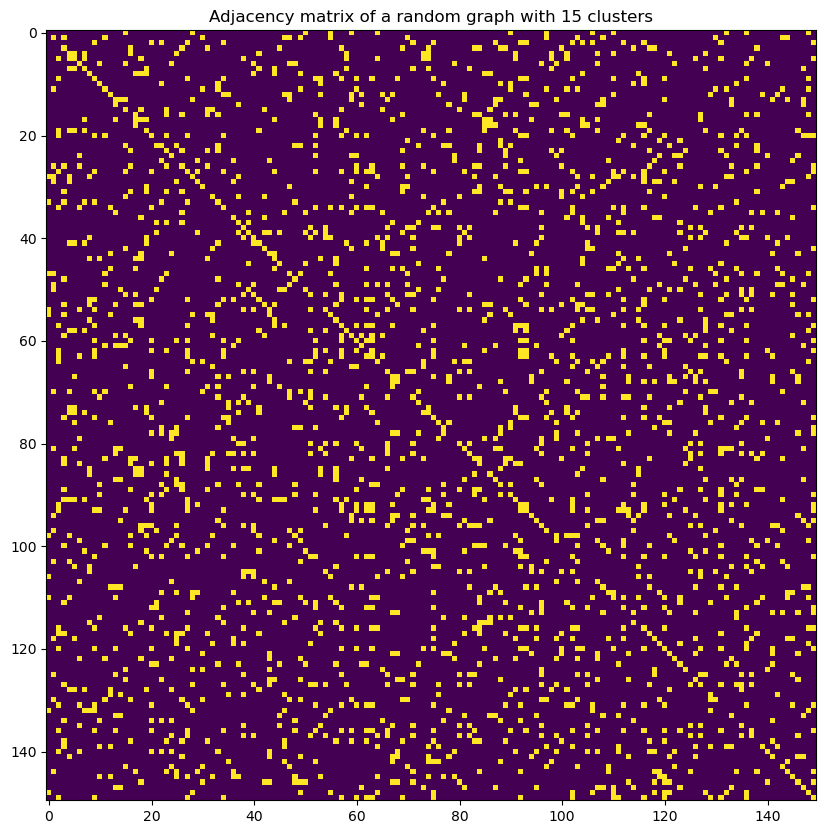

In [54]:
# Erdos-Renyi graph with n nodes and edge probability p intra-cluster and q inter-cluster, with k clusters

def erdos_renyi_graph(n, p, q, k):
   # do the partitions
    partitions = np.random.choice(k, n)
    A = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            if partitions[i] == partitions[j]:
                A[i,j] = np.random.binomial(1, p)
            else:
                A[i,j] = np.random.binomial(1, q)
    return A

# Erdos-Renyi graph with n nodes and edge probability p intra-cluster and q inter-cluster, with k clusters
n = 150
p = 0.8
q = 0.05
k = 15
A = erdos_renyi_graph(n, p, q, k)

# Plot the graph
plt.figure(figsize=(10,10))
plt.imshow(A)
plt.title('Adjacency matrix of a random graph with 15 clusters')
plt.show()








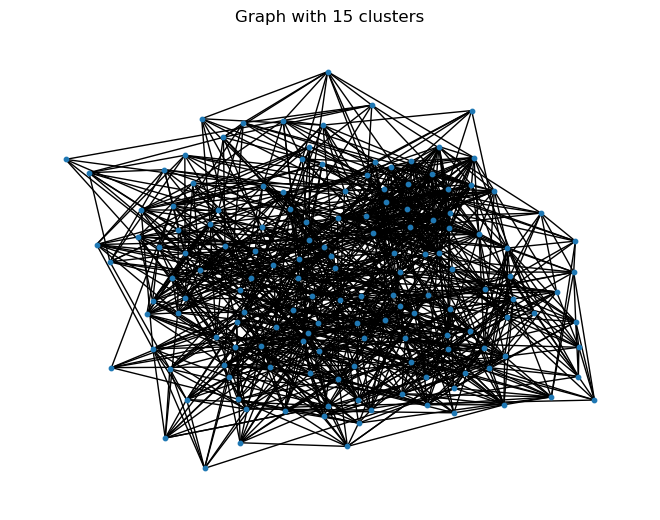

In [55]:
def from_adjacency_to_graph(A):
    G = nx.Graph()
    G.add_nodes_from(range(A.shape[0]))
    for i in range(A.shape[0]):
        for j in range(i+1,A.shape[0]):
            if A[i,j] == 1:
                G.add_edge(i,j)
    return G

G = from_adjacency_to_graph(A)
nx.draw(G, node_size=10)
plt.title('Graph with 15 clusters')
plt.show()


In [59]:
h = 0.1

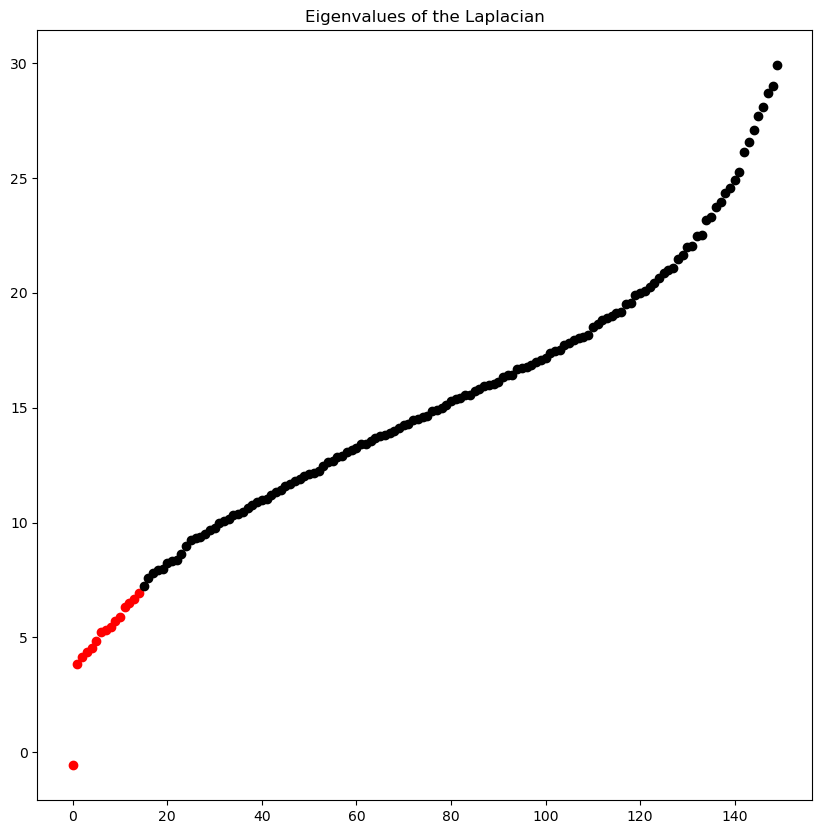

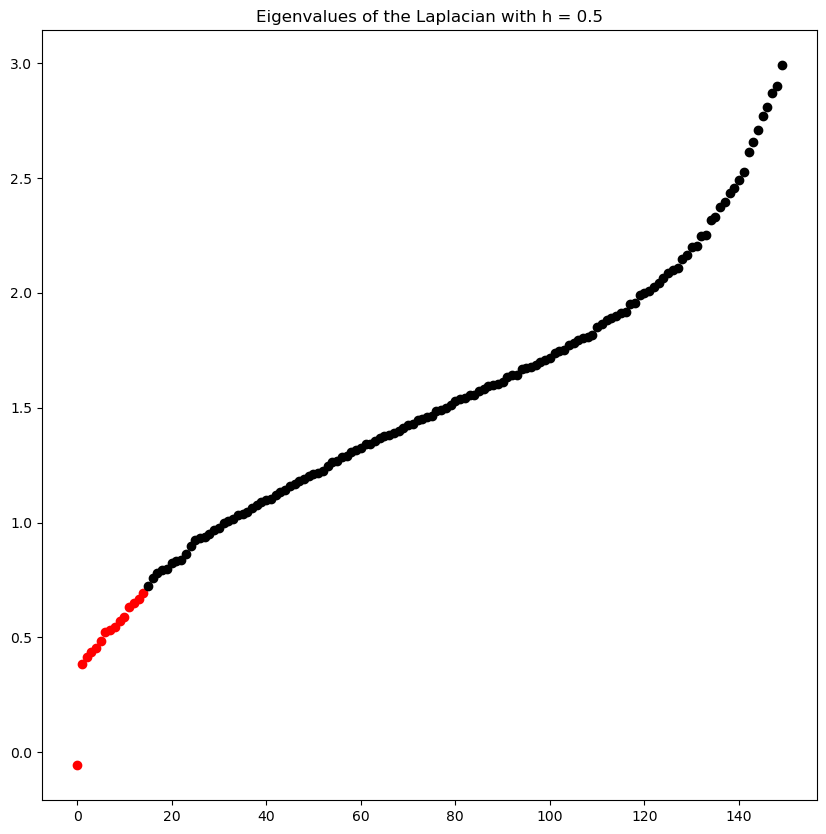

In [60]:
# Spectral decomposition of the Laplacian
L = laplacian(A)
Lh = h * L
eigvals, eigvecs = np.linalg.eigh(L)
eigvals_h, eigvecs_h = np.linalg.eigh(Lh)

# Plot the first 15 eigenvalues in red and the rest in black
plt.figure(figsize=(10,10))
plt.scatter(range(15), eigvals[:15], color='red')
plt.scatter(range(15, len(eigvals)), eigvals[15:], color='black')
plt.title('Eigenvalues of the Laplacian')
plt.show()

# Plot the first 15 eigenvalues in red and the rest in black
plt.figure(figsize=(10,10))
plt.scatter(range(15), eigvals_h[:15], color='red')
plt.scatter(range(15, len(eigvals_h)), eigvals_h[15:], color='black')
plt.title('Eigenvalues of the Laplacian with h = 0.5')
plt.show()


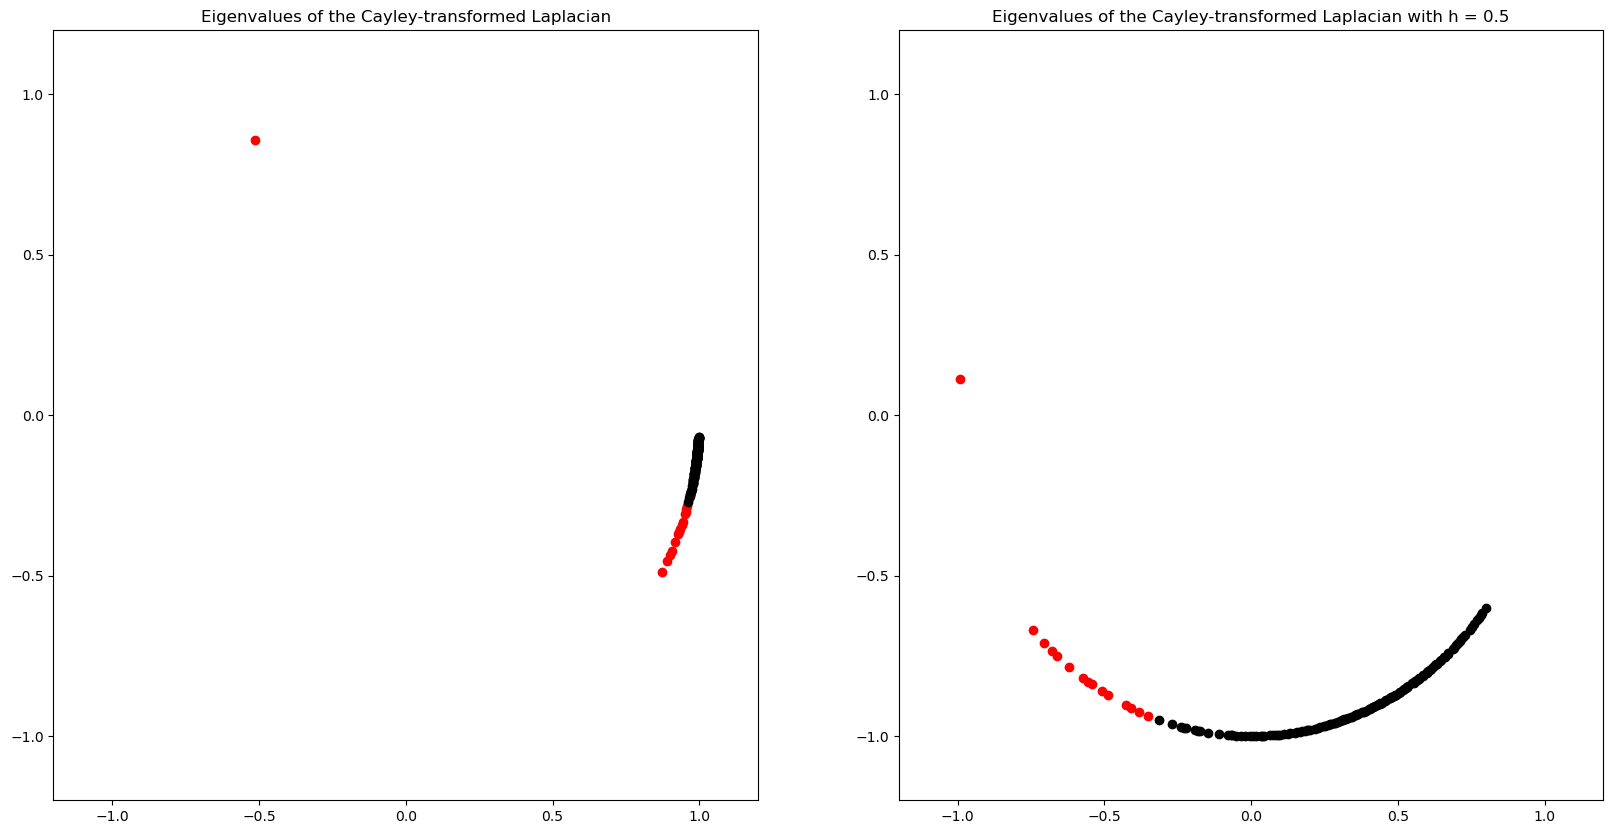

In [76]:
# transform the eigenvalues of the Laplacian
eigvals_cayley = cayley_transform(eigvals)
eigvals_h_cayley = cayley_transform(eigvals_h)


# Plot both results into subplots
fig, axs = plt.subplots(1,2, figsize=(20,10))
axs[0].scatter(np.real(eigvals_cayley[:15]), np.imag(eigvals_cayley[:15]), color='red')
axs[0].scatter(np.real(eigvals_cayley[15:]), np.imag(eigvals_cayley[15:]), color='black')
# center on the origin
axs[0].set_xlim([-1.2,1.2])
axs[0].set_ylim([-1.2,1.2])
axs[0].set_title('Eigenvalues of the Cayley-transformed Laplacian')
axs[1].scatter(np.real(eigvals_h_cayley[:15]), np.imag(eigvals_h_cayley[:15]), color='red')
axs[1].scatter(np.real(eigvals_h_cayley[15:]), np.imag(eigvals_h_cayley[15:]), color='black')
# center on the origin
axs[1].set_xlim([-1.2,1.2])
axs[1].set_ylim([-1.2,1.2])

axs[1].set_title('Eigenvalues of the Cayley-transformed Laplacian with h = 0.5')
plt.show()

